In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA

In [19]:
data=pd.read_csv("dataset.csv")

In [20]:
print(data)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g      sex  
0         3750.0     ma

In [21]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [22]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it
---------------------------------------------------------------------------------------------------------------------------------------------------------

ANS :
We start by looking for inaccurate and missing data in order to sanitize the dataset. The `isnull().sum()` function is used to identify missing values, and `info()` and `describe()` are used to examine the structure and statistics of the dataset. Depending on the data distribution, the mean or median is used to impute missing values for numerical columns such as `bill_length_mm` or `body_mass_g`. To guarantee consistent scales for machine learning models, numerical features are cleaned and then standardized using programs like `StandardScaler`. Following these procedures, we examine the dataset for any anomalies or missing values that may still exist. The dataset is guaranteed to be error-free, normalized, and prepared for analysis or predictive modeling thanks to our methodical cleaning procedure.

In [23]:
#The info() method will be used to reveal  the missing values, data types, and column names of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [24]:
data.sex.unique()

array(['male', 'female', nan, 'unknown'], dtype=object)

In [25]:
#checking MissingValues
data.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [30]:
# data imputation for  missing  values with the statitics methods
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].median(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].median(), inplace=True)



In [31]:
# For missing categorical values 
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

 Identify Incorrect Data

In [32]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.876855,17.152035,200.915205,4272.674419
std,5.422408,1.969060,14.020657,1116.092060
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,43.876855,17.300000,197.000000,4050.000000
75%,48.400000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,15000.000000


In [33]:
#outliers
data[data['flipper_length_mm'] < 150]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Normalization

In [34]:
sc = StandardScaler()
data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = sc.fit_transform(
    data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
)

In [35]:
# Verify no missing values remain
print(data.isnull().sum())

# Check the first few rows
print(data.head())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.882230       0.787289          -1.422488   
1  Adelie  Torgersen       -0.808355       0.126114          -1.065352   
2  Adelie  Torgersen       -0.660604       0.431272          -0.422507   
3  Adelie  Torgersen        0.000000       0.075255           0.000000   
4  Adelie  Torgersen       -1.325483       1.092447          -0.565361   

   body_mass_g     sex  
0    -0.468990    male  
1    -0.424125  female  
2    -0.917634  female  
3    -0.199803    male  
4    -0.738176  female  


 What is the average body_mass_g for Gentoo penguins? 
 ----------------------------------------------------
 ANS:
 Gentoo penguins have an average body mass of 0.76 grams.


In [ ]:
# Filtering  dataset for finding of Gentoo penguins in species
gentoo_penguins = data[data['species'] == 'Gentoo']

# Calculate the average body_mass_g using mean method
average_body_mass = gentoo_penguins['body_mass_g'].mean()

print(f"Gentoo penguins have an average body mass of {average_body_mass:.2f} grams.")


Gentoo penguins have an average body mass of 0.76 grams.


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)
---
ANS:
Some distributional features are shown by analyzing the skewness and kurtosis for `bill_length_mm` and `bill_depth_mm` for each of the three penguin species. In the case of Adelie penguins, the kurtosis of -0.23 indicates a somewhat platykurtic distribution with lighter tails than a normal distribution, while `bill_length_mm` has a minor rightward skew (0.16), implying that the majority of values are clustered on the left with a few bigger values. The kurtosis (-0.10) for `bill_depth_mm` suggests that the distribution is about normal, with somewhat lighter tails, while the skewness (0.33) indicates a little rightward skew. Chinstrap penguins show essentially symmetric distributions for both features, with a platykurtic distribution indicated by a kurtosis of -0.12 and a slight negative skew (-0.10) in `bill_length_mm`.`Bill_depth_mm` has a more noticeable platykurtic distribution (kurtosis of -0.90) and nearly zero skew (0.01). The most noticeable patterns are shown in Gentoo penguins, where `bill_length_mm` exhibits a noticeable rightward skew (0.71) and leptokurtic traits (kurtosis of 1.15), indicating that the data is concentrated around the mean with heavier tails. The skewness (0.35) and kurtosis (-0.58) for `bill_depth_mm` point to a modest rightward skew and a platykurtic distribution with lighter tails, respectively. In general, Chinstrap and Adelie penguins exhibit more mild skewness and kurtosis patterns, but Gentoo penguins have more extreme values, especially for `bill_length_mm`.


In [ ]:
# Group the data by species
species_groups = data.groupby('species')
results = []
for species, group in species_groups:
    for feature in ['bill_length_mm', 'bill_depth_mm']:
        feature_skewness = skew(group[feature].dropna())  # Exclude missing values
        feature_kurtosis = kurtosis(group[feature].dropna())
        
        
        results.append({
            'Species': species,
            'Feature': feature,
            'Skewness': feature_skewness,
            'Kurtosis': feature_kurtosis
        })

# Convert the list of results into a DataFrame
analysis_results = pd.DataFrame(results)

# results
print(analysis_results)

     Species         Feature  Skewness  Kurtosis
0     Adelie  bill_length_mm  0.162533 -0.228104
1     Adelie   bill_depth_mm  0.329567 -0.096039
2  Chinstrap  bill_length_mm -0.095936 -0.124011
3  Chinstrap   bill_depth_mm  0.006726 -0.898740
4     Gentoo  bill_length_mm  0.712323  1.147647
5     Gentoo   bill_depth_mm  0.346413 -0.584449


Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.
----
ANS:
We employ the Interquartile Range (IQR) method, a popular technique for identifying values that substantially differ from the majority of the data, to find outliers in the dataset. To find the IQR (Q3 - Q1) for each characteristic, we compute the first quartile (Q1) and the third quartile (Q3). Any data points that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` are considered outliers. Using box plots, which show the data distribution and indicate any points outside the whiskers as outliers, we visualize the outliers once they have been identified. It is believed that these points diverge greatly from the remaining data. The IQR is displayed in a box plot, where the whiskers extend to the highest and lowest values that are not outliers, and the median is shown as a line inside the box. Outliers are represented by plotting any data points outside of these whiskers as isolated points. This technique ensures a deeper comprehension of the data distribution and makes additional analysis easier by visually and quantitatively identifying features with unexpected values.

In [ ]:

# Define a function to detect outliers using IQR
def detect_outliers(df, feature):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return outliers


In [45]:

# List of features to check for outliers
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a DataFrame to store outliers
outlier = pd.DataFrame()

# Check for outliers in each feature
for feature in features:
    outliers = detect_outliers(data, feature)
    outlier[feature] = outliers[feature]


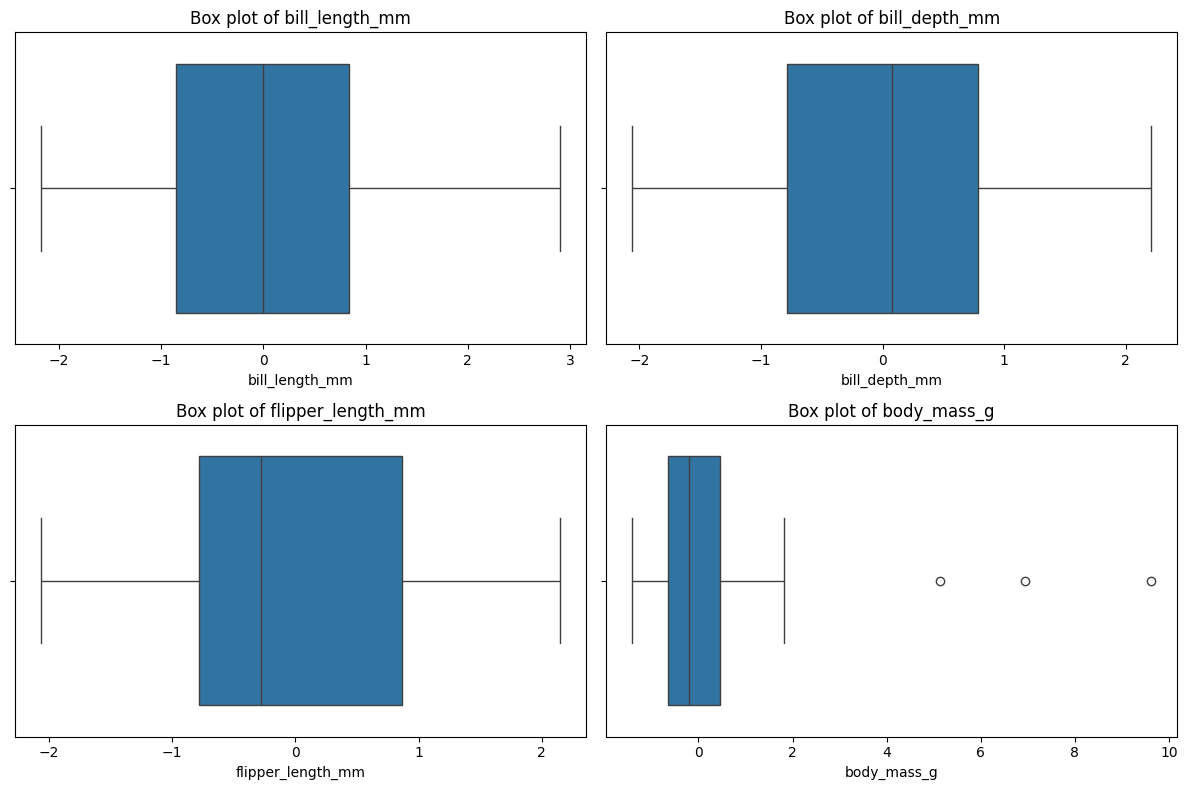

Outliers in bill_length_mm:
 []
Outliers in bill_depth_mm:
 []
Outliers in flipper_length_mm:
 []
Outliers in body_mass_g:
 [9.62550679 6.93364104 5.13906387]


In [47]:
# Visualize the outliers using box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()
for feature in features:
    outliers = detect_outliers(data, feature)
    print(f"Outliers in {feature}:\n", outliers[feature].values)


Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA.
----
ANS:
The problems that come up when working with datasets that have a lot of features are known as the "curse of dimensionality," and they can include overfitting, subpar model performance, and visualization challenges. Bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, and species are among the relatively few features in the dataset you provided. However, the curse of dimensionality usually becomes a serious issue when the number of features increases significantly and the dataset does not contain enough data points to support those dimensions. In this instance, it might not be a big deal because the dataset is small and only contains a few number features. Principal Component Analysis (PCA) can be used, nevertheless, if you want to simplify the dataset and make sure that the features are making the best possible contribution to the analysis. 

<IPython.core.display.Javascript object>

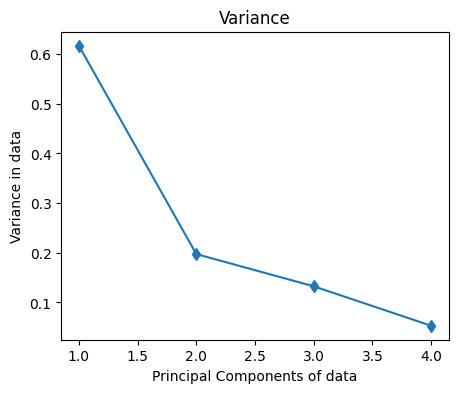

In [56]:

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(data[numerical_features])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='d', linestyle='-')
plt.title('Variance')
plt.xlabel('Principal Components of data')
plt.ylabel('Variance in data')
plt.show()

#7 plots

In [60]:
X='bill_length_mm'
Y='bill_depth_mm'

1. Scatter Plot

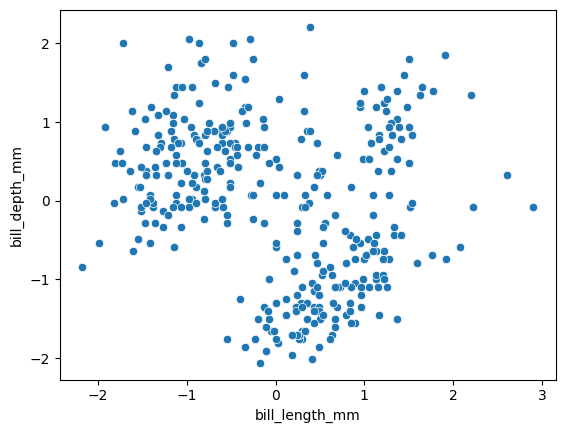

In [61]:
sns.scatterplot(x=data[X],y=data[Y])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

2. pairplot

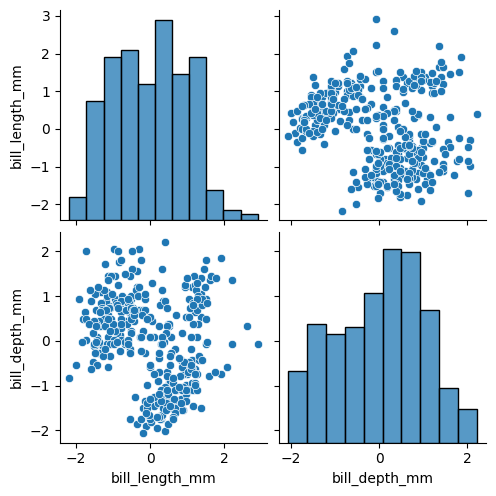

In [63]:
sns.pairplot(data[['bill_length_mm', 'bill_depth_mm']])
plt.show()

3. LinePlot

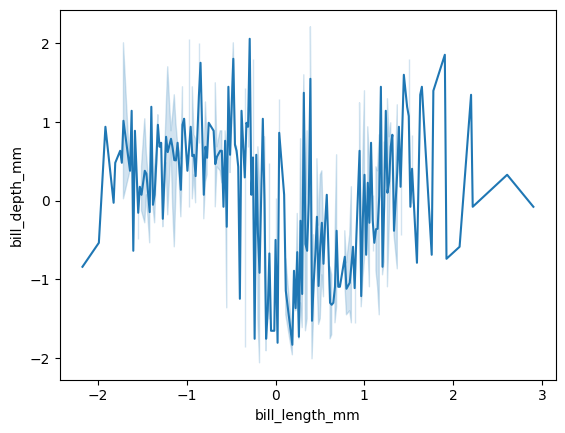

In [64]:
sns.lineplot(x=data[X], y=data[Y])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

4. BarPlot

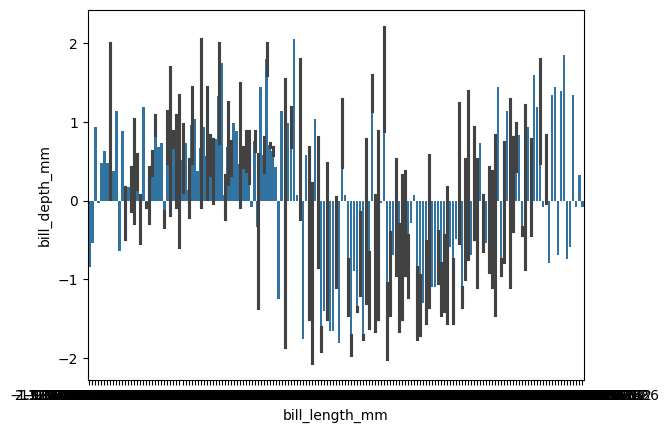

In [65]:
sns.barplot(x=data[X], y=data[Y])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

5. BoxPlot

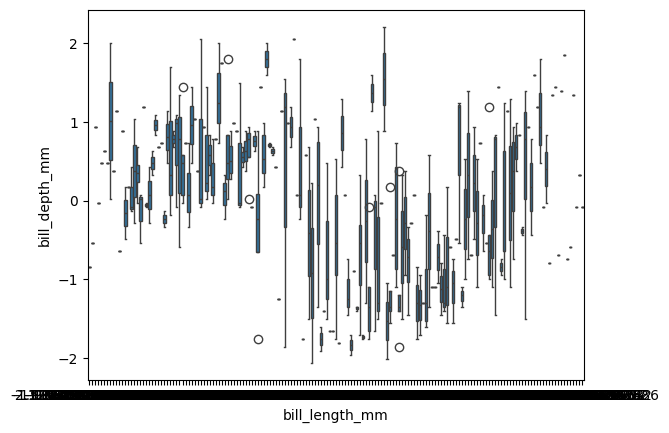

In [66]:
sns.boxplot(x=data[X], y=data[Y])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

6. ViolinPlot

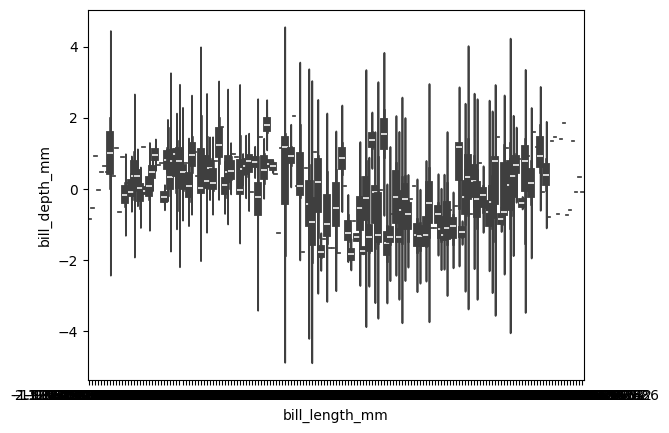

In [67]:
sns.violinplot(x=data[X], y=data[Y])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

7. HeatMap

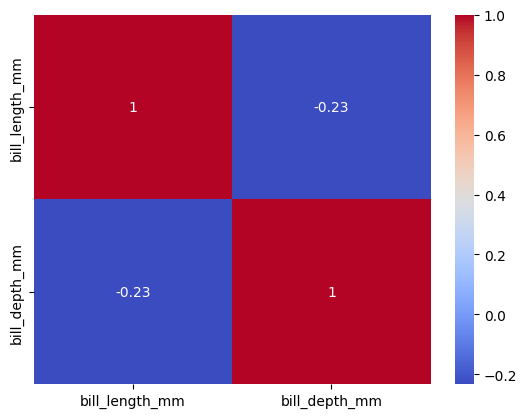

In [68]:
sns.heatmap(data[['bill_length_mm', 'bill_depth_mm']].corr(), annot=True, cmap='coolwarm')
plt.show()

8. Regression Plot

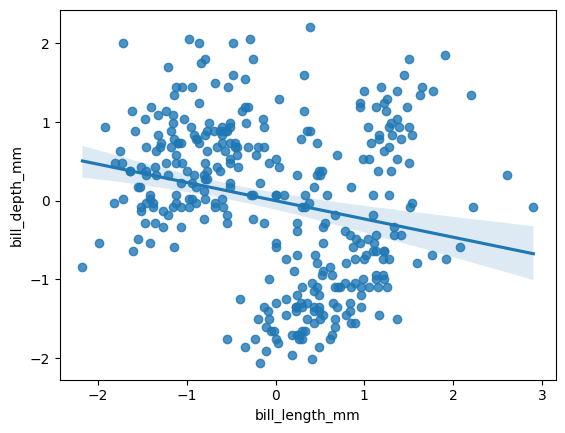

In [69]:
sns.regplot(x=data[X], y=data[Y])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

Grouping by species and island and also to find the maximum flipper_length_mm of each group To find species of each Island which has longest flipper_length_mm idxmax is helpful to get index of the maximum flipper length for each island

Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?
---
ANS:
The species that has the longest flippers on each island is  Gentoo   with 2.148873 mm 

In [71]:
max_flipper = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

In [72]:
longest_flipper_species = data.loc[data.groupby('island')['flipper_length_mm'].idxmax()]

print(max_flipper)



     species     island  flipper_length_mm
0     Adelie     Biscoe           0.148911
1     Adelie      Dream           0.506047
2     Adelie  Torgersen           0.648902
3  Chinstrap      Dream           0.791756
4     Gentoo     Biscoe           2.148873


In [ ]:
print(longest_flipper_species[['island', 'species', 'flipper_length_mm']])

        island    species  flipper_length_mm
215     Biscoe     Gentoo           2.148873
323      Dream  Chinstrap           0.791756
129  Torgersen     Adelie           0.648902


Q8: Perform z-score normalization on this dataset.
--
ANS
Z-score normalization, or standardization, is a process of rescaling the features in a dataset so that each feature has a mean of 0 and a standard deviation of 1. This technique is important because many machine learning algorithms are sensitive to the scale of the data, and features with larger values can disproportionately influence the model. To perform Z-score normalization, each feature is transformed using the formula \( Z = \frac{X - \mu}{\sigma} \), where \( X \) is the original value, \( \mu \) is the mean of the feature, and \( \sigma \) is the standard deviation. By applying Z-score normalization, the dataset’s features become comparable in terms of scale, ensuring that no feature dominates due to its magnitude. This is especially useful when using algorithms such as SVM, k-NN, and logistic regression, which assume that all features contribute equally. After normalization, each feature in the dataset will have a mean of 0 and a standard deviation of 1, making it easier for machine learning algorithms to process and learn from the data effectively.

In [74]:
num_col = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
num_col

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [76]:
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])

In [78]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-8.822304e-01,0.787289,-1.422488e+00,-0.468990,male
1,Adelie,Torgersen,-8.083550e-01,0.126114,-1.065352e+00,-0.424125,female
2,Adelie,Torgersen,-6.606041e-01,0.431272,-4.225067e-01,-0.917634,female
3,Adelie,Torgersen,-8.262125e-17,0.075255,8.262125e-16,-0.199803,male
4,Adelie,Torgersen,-1.325483e+00,1.092447,-5.653611e-01,-0.738176,female
